In [1]:
import importlib
import get_rho_etc
importlib.reload(get_rho_etc)
from get_rho_etc import *
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/hcleroy/Extra_Module_py')
import formated_matplotlib
import matplotlib.cm as cm
cmap = cm.get_cmap('viridis')

/tmp/ipykernel_55006/2334685415.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


In [26]:
# Common Parameters :
size = 20
Vs = [1.,0.,2.,0.]
Es = [1.,2.]
steeps = [1,1,1,1]
mu = 1.
kab0=1. # !!!!!!!!!!! this is not an adjustable parameter !!!!!!!!!!!!!!!!!
# stochastic matrix parameters :
X0,Xf,n = 0,size,40000 # lower/higher spacial boundary and number of discretizing points
dx = (Xf-X0)/n

# steepness range

In [28]:
OD = list()
for steep in np.linspace(1.,30,100):
    steeps = [steep for _ in range(4)]
    OD.append([steep,OneD_Phase_sep(Vs,Es,steeps,mu,size,X0,Xf,n)])

In [29]:
for od in OD:
    od[1].compute_rhos()

In [30]:
OD.__len__()/10

10.0

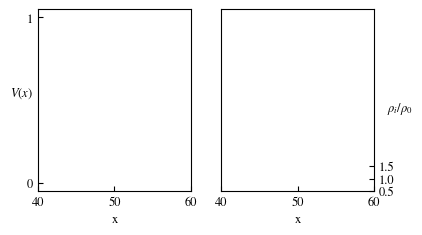

In [31]:
width_mm = 110
height_mm = 60
width_inches = width_mm / 25.4
height_inches = height_mm / 25.4
fig,ax = plt.subplots(ncols = 2, figsize = (width_inches,height_inches))
i = 0
for index in [0,1,2,3,4,5,10,30,40,50]:
    od = OD[index]
    ax[0].plot(od[1].X,od[1].va(od[1].X),color=cmap(i/(OD.__len__()/10)))
    #ax[0].plot(od[1].X,od[1].vb(od[1].X),color=cmap(i/(OD.__len__()/10)))
    #ax[0].plot(od[1].X,od[1].vab1(od[1].X),color=cmap(i/(OD.__len__()/10)))
    #ax[0].plot(od[1].X,od[1].vab2(od[1].X),color=cmap(i/(OD.__len__()/10)))
    ax[1].yaxis.set_ticks_position('right')
    ax[1].yaxis.set_label_position('right')
    ax[1].plot(od[1].X,od[1].rhob*200,color=cmap(i/(OD.__len__()/10)),label=f"{od[0]:.1f}")
    ax[1].plot(od[1].X,od[1].rhoa*200,color=cmap(i/(OD.__len__()/10)),label=f"{od[0]:.1f}")
    i+=1

ax[0].set_ylabel(r'$V(x)$',rotation=0.)
ax[0].set_xlabel('x')

ax[1].set_ylabel(r'$\rho_i/ \rho_0$',rotation=0.)
ax[1].set_xlabel('x')


ax[0].set_xlim(40,60)
ax[1].set_xlim(40,60)
ax[1].set_yticks([0.5,1.,1.5])
ax[1].set_xticks([40,50,60])
ax[0].set_yticks([0,1.])
ax[0].set_xticks([40,50,60])

#plt.savefig('potential_rho.svg',transparent=True,bbox_inches='tight')

In the next cell, we compute the total production over the whole system, as well as the total flux integrated over space. It is not the right thing to look at, therefore we look at something else in the next cell.

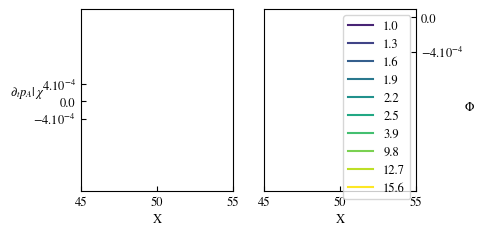

In [32]:
width_mm = 110
height_mm = 60
width_inches = width_mm / 25.4
height_inches = height_mm / 25.4
fig,ax = plt.subplots(ncols = 2, figsize = (width_inches,height_inches))

tot_prod = list()
tot_diff_flux=list()
tot_chem_flux = list()
i=0
for index in [0,1,2,3,4,5,10,30,40,50]:
    i+=1
    od = OD[index]

    prod = od[1].get_prod()
    tot_prod.append([od[0],sum(abs(prod)*dx)])
    tot_diff_flux.append([od[0],sum(abs(od[1].get_diff_fluxs()[0]*dx))])
    ax[0].plot(od[1].X,prod,label='steep = '+str(od[0]),color=cmap(i/(OD.__len__()/10)))
    ax[1].plot(od[1].X,od[1].get_diff_fluxs()[0],color=cmap(i/(OD.__len__()/10)),label=f"{od[0]:.1f}")
#ax[0].set_ylim(-0.000025,0.000025)
#ax[1].set_ylim(-0.0001,0.)

ax[1].yaxis.set_ticks_position('right')
ax[1].yaxis.set_label_position('right')

ax[1].set_ylabel(r'$\Phi$',rotation=0)
ax[0].set_ylabel(r'$\partial_t p_A|_ \chi$',rotation=0)
ax[0].set_xlabel('X')
ax[1].set_xlabel('X')

ax[0].set_yticks([-0.0004,0.,0.0004],[r'$-4.10^{-4}$',0.,r'$4.10^{-4}$'])
ax[0].set_xticks([45,50,55])
ax[1].set_xticks([45,50,55])
ax[1].set_yticks([-0.0004,0.],[r'$-4.10^{-4}$',0.])

ax[0].set_xlim(45,55)
ax[1].set_xlim(45,55)
tot_prod = np.array(tot_prod)
tot_diff_flux = np.array(tot_diff_flux)
plt.legend()
#plt.savefig('fluxes_production_steepness.svg',transparent=True,bbox_inches='tight')

Here we look at the integral of the production from 0 to X that should be equal to the diffusive flux in X. Moreover, we look at the chemical flux in space, that shouldn't be equal to the production (obvioulsy) and shouldn't be non-zero

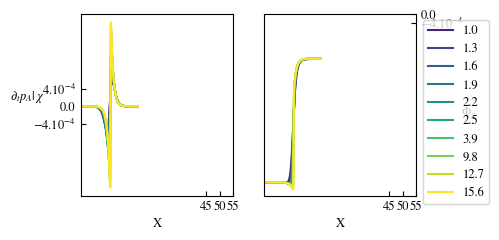

In [33]:
width_mm = 110
height_mm = 60
width_inches = width_mm / 25.4
height_inches = height_mm / 25.4
fig,ax = plt.subplots(ncols = 2, figsize = (width_inches,height_inches))

tot_prod_X = list()
tot_chem_flux = list()
diff_flux = list()
i=0
for index in [0,1,2,3,4,5,10,30,40,50]:
    i+=1
    od = OD[index]
    prod = od[1].get_prod()
    chem_flux = od[1].get_chem_fluxs()
    tot_prod_X.append([od[0],sum(abs(prod[:prod.shape[0]//2])*dx)]) # integral between -L and 0 (half side)
    tot_chem_flux.append([od[0],sum(chem_flux[:chem_flux.shape[0]//2]*dx)])
    diff_flux_A = od[1].get_diff_fluxs()[0]
    diff_flux.append([od[0],diff_flux_A[diff_flux_A.shape[0]//2]])
    ax[0].plot(od[1].X,prod,label='steep = '+str(od[0]),color=cmap(i/(OD.__len__()/10)))
    ax[1].plot(od[1].X,od[1].get_chem_fluxs(),color=cmap(i/(OD.__len__()/10)),label=f"{od[0]:.1f}")
#ax[0].set_ylim(-0.000025,0.000025)
#ax[1].set_ylim(-0.0001,0.)

ax[1].yaxis.set_ticks_position('right')
ax[1].yaxis.set_label_position('right')

ax[1].set_ylabel(r'$\Phi_\chi$',rotation=0)
ax[0].set_ylabel(r'$\partial_t p_A|_ \chi$',rotation=0)
ax[0].set_xlabel('X')
ax[1].set_xlabel('X')

ax[0].set_yticks([-0.0004,0.,0.0004],[r'$-4.10^{-4}$',0.,r'$4.10^{-4}$'])
ax[0].set_xticks([45,50,55])
ax[1].set_xticks([45,50,55])
ax[1].set_yticks([-0.0004,0.],[r'$-4.10^{-4}$',0.])

#ax[0].set_xlim(45,55)
#ax[1].set_xlim(45,55)
tot_prod_X = np.array(tot_prod_X)
tot_chem_flux = np.array(tot_chem_flux)
diff_flux = np.array(diff_flux)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
#plt.savefig('fluxes_production_steepness.svg',transparent=True,bbox_inches='tight')

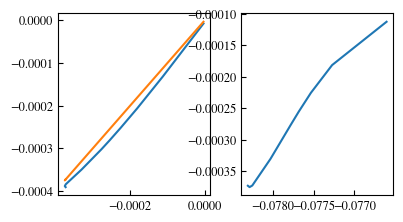

In [23]:
width_mm = 110
height_mm = 60
width_inches = width_mm / 25.4
height_inches = height_mm / 25.4
fig,ax = plt.subplots(ncols=2,figsize = (width_inches,height_inches))
ax[0].plot(diff_flux[:,1],-tot_prod_X[:,1])
ax[0].plot(diff_flux[:,1],diff_flux[:,1])

ax[1].plot(tot_chem_flux[1:,1],diff_flux[1:,1])

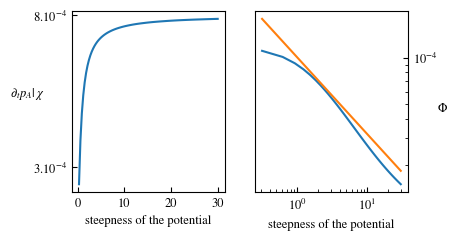

In [183]:

ax[0].plot(tot_prod[1:,0],tot_prod[1:,1])
ax[1].plot(tot_diff_flux[1:,0],tot_diff_flux[1:,1]-7*10**-4)
ax[1].plot(tot_diff_flux[1:,0],1/tot_diff_flux[1:,0]**0.5*0.0001)

ax[0].set_xlabel('steepness of the potential')
ax[1].set_xlabel('steepness of the potential')
ax[0].set_ylabel(r'$\partial_t p_A|_ \chi$',rotation=0)
ax[1].set_ylabel(r'$\Phi$',rotation=0.)
ax[1].yaxis.set_ticks_position('right')
ax[1].yaxis.set_label_position('right')
ax[0].set_yticks([0.0003,0.0008],[r'$3.10^{-4}$',r'$8.10^{-4}$'])
#ax[1].set_yticks([0.00072,0.0008],[r'$7.2.10^{-4}$',r'$8.10^{-4}$'])
#ax[0].set_yscale('log')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
#plt.savefig('production_diffusive_flux.svg',transparent=True,bbox_inches='tight')

# Activity range

In [86]:
# Common Parameters :
size = 100
Vs = [1.,0.,2.,0.]
Es = [1.,2.]
steeps = [1,1,1,1]
mu = 1.
kab0=1. # !!!!!!!!!!! this is not an adjustable parameter !!!!!!!!!!!!!!!!!
# stochastic matrix parameters :
X0,Xf,n = 0,size,40000 # lower/higher spacial boundary and number of discretizing points
dx = (Xf-X0)/n

In [87]:
OD = list()
for mu in np.linspace(0,10,100):
    OD.append([mu,OneD_Phase_sep(Vs,Es,steeps,mu,size,X0,Xf,n)])

In [88]:
for od in OD:
    od[1].compute_rhos()

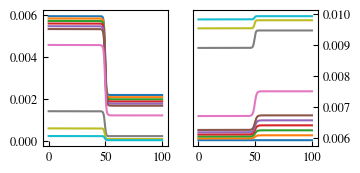

In [113]:
width_mm = 90
height_mm = 45
width_inches = width_mm / 25.4
height_inches = height_mm / 25.4
fig,ax = plt.subplots(ncols = 2, figsize = (width_inches,height_inches))
for index in [0,1,2,3,4,5,10,30,40,50]:
    od = OD[index]
    ax[0].plot(od[1].X,od[1].rhoa,label='steep = '+str(od[0]))
    ax[1].yaxis.set_ticks_position('right')
    ax[1].yaxis.set_label_position('right')
    ax[1].plot(od[1].X,od[1].rhob,label='steep = '+str(od[0]))

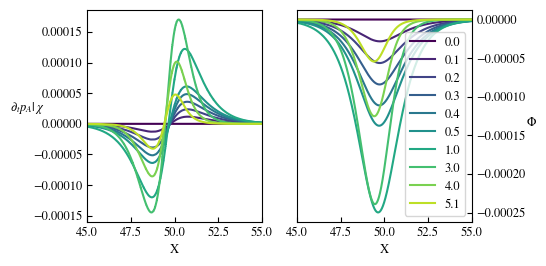

In [112]:
width_mm = 126
height_mm = 70
width_inches = width_mm / 25.4
height_inches = height_mm / 25.4
fig,ax = plt.subplots(ncols = 2, figsize = (width_inches,height_inches))

tot_prod = list()
tot_diff_flux=list()
i = 0.
for index in [0,1,2,3,4,5,10,30,40,50]:
    od = OD[index]
    prod = od[1].get_prod() 
    tot_prod.append([od[0],sum(abs(prod)*dx)])
    tot_diff_flux.append([od[0],sum(abs(od[1].get_diff_fluxs()[0]*dx))])
    ax[0].plot(od[1].X,prod,label='steep = '+str(od[0]),color=cmap(i/(OD.__len__()/10)))
    ax[1].plot(od[1].X,od[1].get_diff_fluxs()[0],color=cmap(i/(OD.__len__()/10)),label=f"{od[0]:.1f}")
    i+= 1.
#ax[0].set_ylim(-0.000025,0.000025)
#ax[1].set_ylim(-0.0001,0.)
tot_prod = np.array(tot_prod)
tot_diff_flux = np.array(tot_diff_flux)
ax[0].set_xlim(45,55)
ax[1].set_xlim(45,55)
ax[1].legend()
ax[1].yaxis.set_ticks_position('right')
ax[1].yaxis.set_label_position('right')
ax[1].set_ylabel(r'$\Phi$',rotation=0)
ax[0].set_ylabel(r'$\partial_t p_A|_ \chi$',rotation=0)
ax[0].set_xlabel('X')
ax[1].set_xlabel('X')
#plt.savefig('fluxes_production.svg',transparent=True,bbox_inches=('tight'))

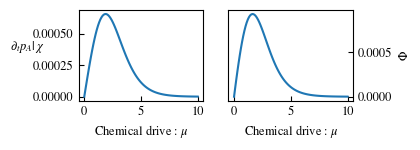

In [92]:
width_mm = 90
height_mm = 30
width_inches = width_mm / 25.4
height_inches = height_mm / 25.4
fig,ax = plt.subplots(ncols=2,figsize = (width_inches,height_inches))
ax[0].plot(tot_prod[:,0],tot_prod[:,1])
ax[1].plot(tot_diff_flux[:,0],tot_diff_flux[:,1])

ax[0].set_xlabel(r'Chemical drive : $\mu$')
ax[0].set_ylabel(r'$\partial_t p_A|_ \chi$',rotation=0)
ax[1].yaxis.set_ticks_position('right')
ax[1].yaxis.set_label_position('right')
#ax[1].set_xscale('log')
#ax[1].set_yscale('log')
ax[1].set_xlabel(r'Chemical drive : $\mu$')
ax[1].set_ylabel(r'$\Phi$')
plt.savefig('chem_prod_diff_mu.svg',transparent=True,bbox_inches='tight')
                 